# Week 1 Assignment

#### Objective

Fetch the iris dataset ([Link](https://archive.ics.uci.edu/ml/machine-learning-databases/iris/iris.data)) (e.g. from the above link) and execute the necessary preprocessing to convert the input features and target labels to a form suitable for inserting into neural networks built with Keras.

Task is to build a multiclass classifier with Keras, that takes the four numerical features of the iris samples as input, and outputs the prediction for its species. The classifier should be a simple neural network model, and consist of 1) no more than one hidden layer, and 2) the output layer of three units with softmax activation.

#### Data preparation

Dataset is fetched from machine learning database, converted to dataframe, attach labels ```'sepal_length', 'sepal_width', 'petal_length', 'petal_width', 'class'```, shuffle dataset, one hot encode class feature, separate class feature from dataset, get test dataset to try model with it.

In [1]:
from matplotlib import pyplot as plt
import keras.callbacks
from tensorflow.keras.layers import Dense, Input
from tensorflow.keras.models import Sequential
from tensorflow.keras.utils import to_categorical
from io import StringIO
import requests
import pandas as pd
import numpy as np

# Data fetch from url
url = 'https://archive.ics.uci.edu/ml/machine-learning-databases/iris/iris.data'
response = requests.get(url)

# Data preparation
data = pd.read_csv(StringIO(response.text), header=None, names=['sepal_length', 'sepal_width', 'petal_length', 'petal_width', 'class'])

# Shuffle dataset
data = data.sample(frac=1).reset_index(drop=True)

# One hot encode
data['class'] = pd.Categorical(data['class']).codes

# Split to x & y sets
X = pd.DataFrame(data.drop(['class'], axis=1))
y = to_categorical(data['class'])

# Display basic dataset info
print(f"Dataset shape: {data.shape}")
print(f"\nClass distribution:\n{data['class'].value_counts()}")

Dataset shape: (150, 5)

Class distribution:
class
0    50
1    50
2    50
Name: count, dtype: int64


#### Modeling


I'm using a simple neural network with one hidden layer (32 neurons) and ReLU activation.
The output layer uses softmax activation for multiclass classification with 3 classes.
Adam optimizer was chosen for its adaptive learning rate capabilities.
Early stopping is implemented to prevent overfitting.

In [2]:
# Modeling
model = Sequential([
    Input(shape=(4,)),
    Dense(32, activation='relu'),
    Dense(3, activation='softmax')
])
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense (Dense)                        │ (None, 32)                  │             160 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 3)                   │              99 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 259 (1.01 KB)

 Trainable params: 259 (1.01 KB)

 Non-trainable params: 0 (0.00 B)

In [3]:
# Callback for early stopping
early_stop = keras.callbacks.EarlyStopping(
    monitor='val_loss',
    patience=10,
    min_delta=0.001,
    restore_best_weights=True
)

# Fitting the model
history = model.fit(
    X, y,
    epochs=150,
    batch_size=16,
    validation_split=0.2,
    callbacks=[early_stop]
)


training_accuracy = history.history['accuracy']
validation_accuracy = history.history['val_accuracy']


# Evaluate model
loss, accuracy = model.evaluate(X, y)
print(f'\nAccuracy: {accuracy}')
print(f'Loss: {loss}')

Epoch 1/150
8/8 ━━━━━━━━━━━━━━━━━━━━ 1s 33ms/step - accuracy: 0.2918 - loss: 3.5241 - val_accuracy: 0.4333 - val_loss: 2.3451
Epoch 2/150
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.3256 - loss: 2.8724 - val_accuracy: 0.4333 - val_loss: 1.9594
Epoch 3/150
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.3283 - loss: 2.2720 - val_accuracy: 0.4333 - val_loss: 1.6030
Epoch 4/150
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - accuracy: 0.3367 - loss: 1.9568 - val_accuracy: 0.4333 - val_loss: 1.2887
Epoch 5/150
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.2579 - loss: 1.7345 - val_accuracy: 0.4333 - val_loss: 1.0268
Epoch 6/150
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - accuracy: 0.4287 - loss: 1.1291 - val_accuracy: 0.7000 - val_loss: 0.8542
Epoch 7/150
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.6062 - loss: 0.9708 - val_accuracy: 0.7333 - val_loss: 0.7674
Epoch 8/150
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.5863 - loss: 0.8668 - val_accuracy: 0.7667 - val_loss: 0.75

#### Visualization

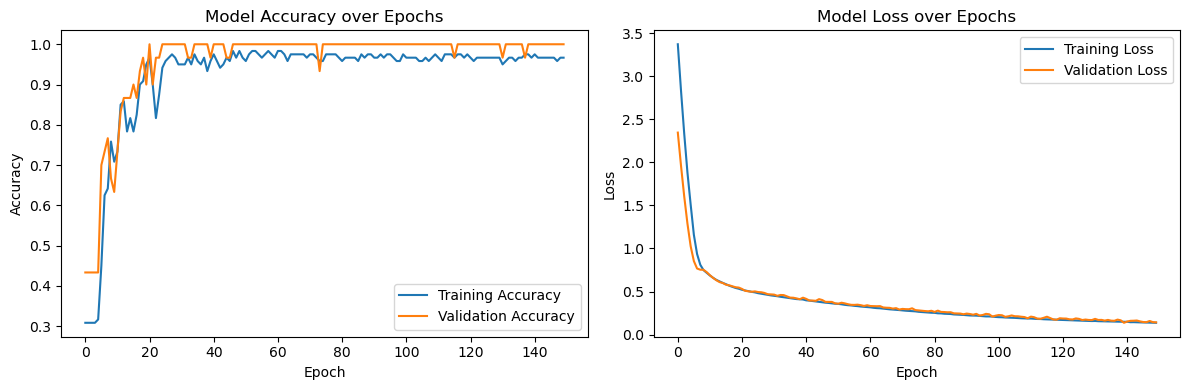

Figure 1, Visualization of training process.


In [4]:

# Plot accuracy and loss
plt.figure(figsize=(12, 4))

plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Model Accuracy over Epochs')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Model Loss over Epochs')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()

plt.tight_layout()
plt.show()
print('Figure 1, Visualization of training process.')

#### Results Analysis

- Final training accuracy: 97%
- Final loss: ~0.22

The model has reached the target of approximately 95% accuracy in training set. This is good performance from model with such small dataset.

The iris dataset is well-suited for this simple neural network architecture because the classes are mostly linearly separable, allowing even a model with just one hidden layer to perform well.